In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
#onehot encoder


In [4]:
d=pd.read_csv("/content/bee_and_wasp.csv")

In [5]:
d.columns

Index(['id', 'color', 'size', 'body_shape', 'habitat', 'nest_type',
       'food_source', 'aggressiveness', 'life_span(days)',
       'queen_egg_rate(per day)', 'queen_presence_per_hive',
       'worker_population', 'drone_population(% of worker_population)',
       'honeycomb_structure', 'wax_production', 'honey_production',
       'communication_method', 'predators', 'hibernation', 'migration',
       'species'],
      dtype='object')

In [46]:
d.sample(5)

,id,color,size,body_shape,habitat,nest_type,food_source,aggressiveness,life_span(days),queen_egg_rate(per day),queen_presence_per_hive,worker_population,drone_population(% of worker_population),honeycomb_structure,wax_production,honey_production,communication_method,predators,hibernation,migration,species
1723,1724,golden,medium,round,garden,ground,flowers,humanfriendly,7.0,1679,2,28243,14.21,hexagonal,True,True,dance,birds,True,False,bee
787,788,golden,large,round,forest,tree,flowers,unidentified,19.0,1937,3,18479,13.81,hexagonal,True,True,dance,birds,True,False,bee
9210,9211,brown,small,slender,meadow,tree,nectar,aggressiveness,17.0,225,1449,4747,4.07,papery,False,False,pheromones,etc,False,True,wasp
4464,4465,golden,medium,round,garden,ground,flowers,humanfriendly,4.0,1910,1,39045,10.05,hexagonal,True,True,dance,etc,True,False,bee
6106,6107,golden,small,slender,meadow,tree,honeydew,aggressiveness,12.0,271,1478,5780,8.73,papery,False,False,pheromones,birds,False,True,wasp


In [47]:
df=d.drop(columns=['id', 'color', 'size', 'body_shape', 'habitat', 'nest_type',
       'food_source', 'aggressiveness','honeycomb_structure', 'wax_production', 'honey_production',
        'predators', 'hibernation', 'migration'])

In [48]:
df.sample(5)

,life_span(days),queen_egg_rate(per day),queen_presence_per_hive,worker_population,drone_population(% of worker_population),communication_method,species
6857,16.0,198,937,3066,5.71,pheromones,wasp
1520,12.0,2086,3,63159,14.15,dance,bee
8863,21.0,193,1600,9123,NaN,pheromones,wasp
3481,29.0,1866,3,49053,9.61,dance,bee
7873,18.0,235,1446,4297,5.01,pheromones,wasp


In [49]:
df['communication_method'].dtype

dtype('O')

In [50]:
df.isnull().sum()

,0
life_span(days),259
queen_egg_rate(per day),0
queen_presence_per_hive,0
worker_population,0
drone_population(% of worker_population),1044
communication_method,0
species,0


In [94]:
si=SimpleImputer(strategy='mean')
le=LabelEncoder()

df['life_span(days)']=si.fit_transform(df[['life_span(days)']])
df['drone_population(% of worker_population)']=si.fit_transform(df[['drone_population(% of worker_population)']])
df['species']=le.fit_transform(df['species'])
df['communication_method']=le.fit_transform(df['communication_method'])


In [95]:
df.isnull().sum()

,0
life_span(days),0
queen_egg_rate(per day),0
queen_presence_per_hive,0
worker_population,0
drone_population(% of worker_population),0
communication_method,0
species,0


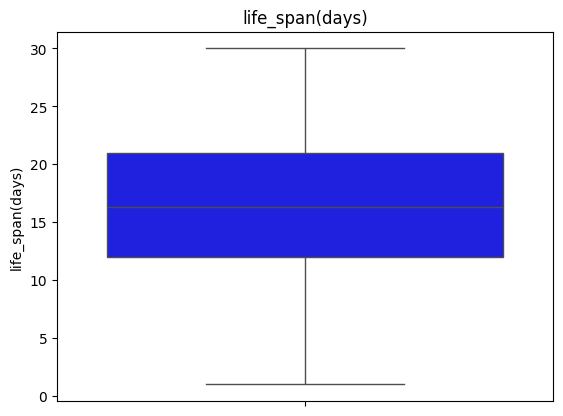

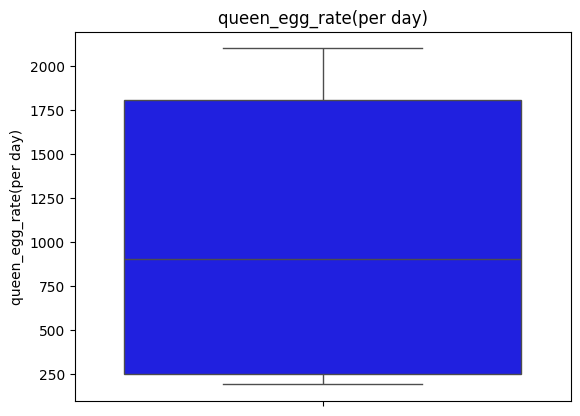

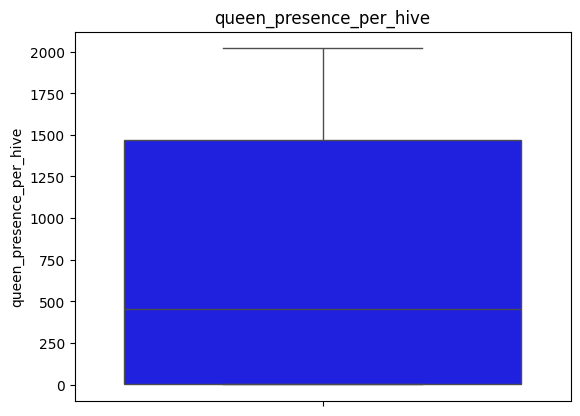

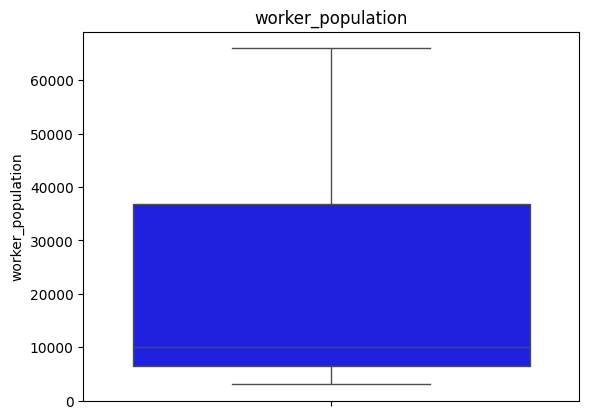

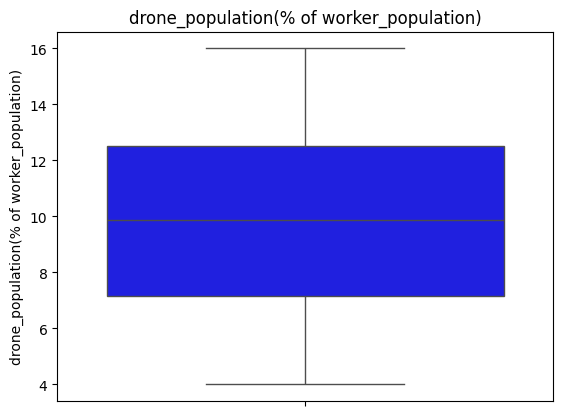

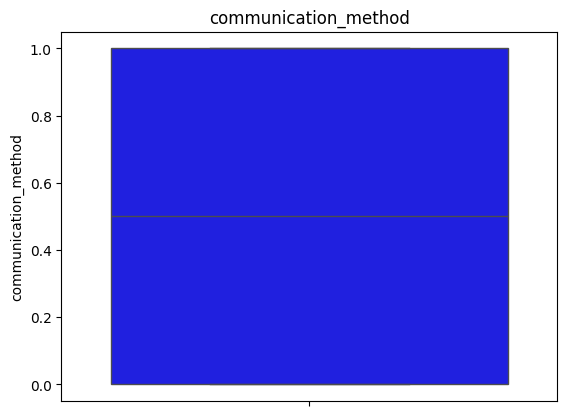

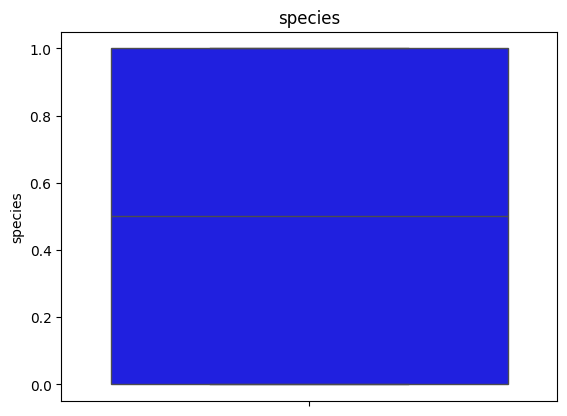

In [96]:
for i in df.columns:
  sns.boxplot(df[i],color='blue')
  plt.title(i)
  plt.show()

In [97]:
 x=df.drop(columns=['species'])
 y=df['species']


In [98]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,1
9998,1


In [99]:
 xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,random_state=42)


In [101]:
xtr

,life_span(days),queen_egg_rate(per day),queen_presence_per_hive,worker_population,drone_population(% of worker_population),communication_method
9254,15.000000,300,1824,6033,6.160000,1
1561,3.000000,1766,1,34506,14.350000,0
1670,8.000000,1772,1,41900,15.190000,0
6087,19.000000,238,1336,3334,9.861659,1
6669,16.265373,282,1217,3535,8.720000,1
...,...,...,...,...,...,...
5734,17.000000,270,903,5805,9.861659,1
5191,12.000000,243,900,6348,7.350000,1
5390,20.000000,198,1942,4005,5.280000,1
860,8.000000,1635,1,32798,13.210000,0


In [102]:
st=StandardScaler()
xtr=st.fit_transform(xtr)
xte=st.transform(xte)

In [107]:
fff=pd.DataFrame(xtr)

In [105]:
pd.DataFrame(xte)

,0,1,2,3,4,5
0,0.406008,-0.937324,0.491700,-0.672563,-0.903782,0.997004
1,-2.132218,0.856893,-0.959185,-0.573078,1.232809,-1.003005
2,0.107393,0.737617,-0.957886,-0.268298,-0.236852,-1.003005
3,-2.281526,1.006622,-0.957886,1.133566,0.058891,-1.003005
4,-0.639144,0.719852,-0.956587,-0.588579,1.450090,-1.003005
...,...,...,...,...,...,...
1995,-0.002292,-0.995693,1.291830,-0.774952,-1.344378,0.997004
1996,0.256701,-1.045180,1.013863,-0.740114,0.005072,0.997004
1997,0.107393,-0.918291,1.654227,-0.684435,-0.879640,0.997004
1998,-0.340529,0.784566,-0.956587,1.840641,0.958191,-1.003005


<ipython-input-110-04b8d9634c79>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr[i])


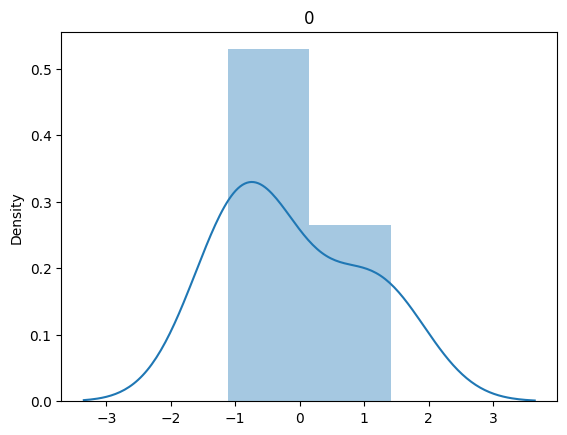

<ipython-input-110-04b8d9634c79>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr[i])


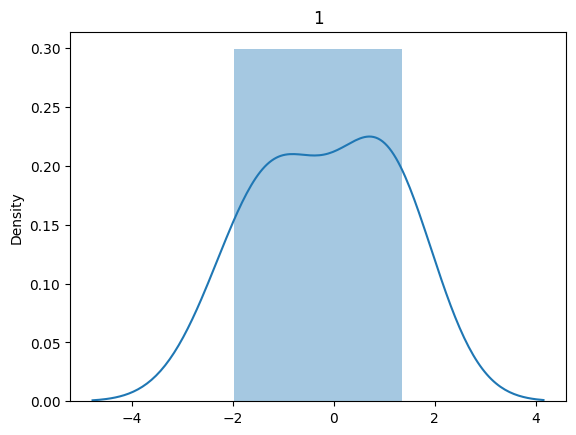

<ipython-input-110-04b8d9634c79>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr[i])


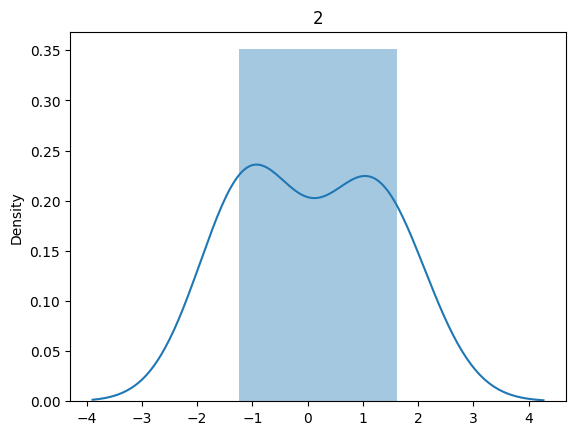

<ipython-input-110-04b8d9634c79>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr[i])


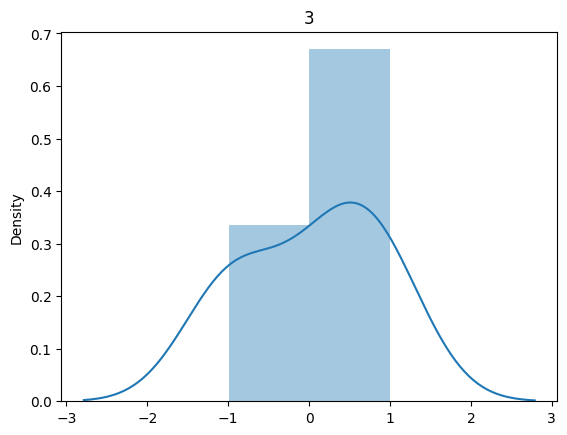

<ipython-input-110-04b8d9634c79>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr[i])


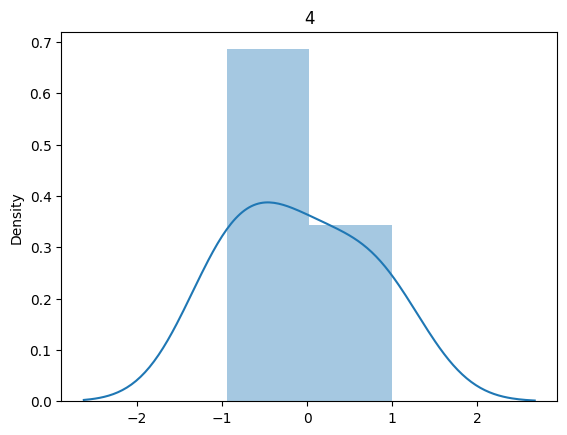

<ipython-input-110-04b8d9634c79>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtr[i])


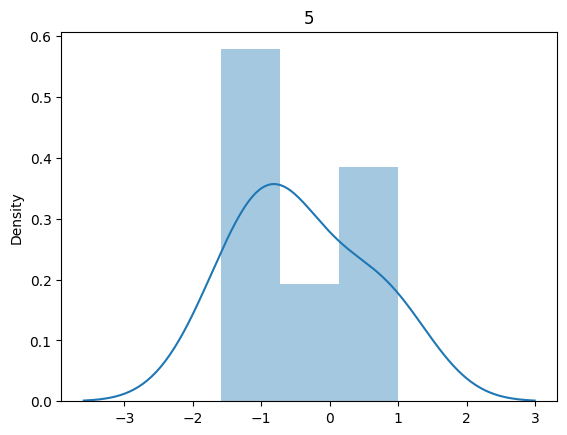

In [110]:
for i in fff:
  sns.distplot(xtr[i])
  plt.title(i)
  plt.show()

In [111]:
#now calling the model
model=RandomForestClassifier()
model.fit(xtr,ytr)

RandomForestClassifier()

In [112]:
#pred and accuracy
pred=model.predict(xte)


In [117]:
#accuracy
accuracy=accuracy_score(yte,pred)
print("your accuracy score is:",accuracy)

your accuracy score is: 1.0
